In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
top_states_data = pd.read_csv("top_states_data.csv")
top_states_data.head()

,property_id,address,street_name,city,state,latitude,longitude,postcode,price,bedroom_number,bathroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type
0,318990176,"649 Hargraves Avenue NE, Royal City, WA 99357",Hargraves Avenue NE,Royal City,WA,46.906307,-119.622284,99357.0,399900.0,4.0,3.0,229.0,1742.0,17193.132,sqft,SINGLE_FAMILY
1,204997510,"15822 S Clear View Loop, Kennewick, WA 99338",S Clear View Loop,Kennewick,WA,46.190080,-119.318460,99338.0,799000.0,4.0,3.0,306.0,2611.0,26893.944,sqft,SINGLE_FAMILY
2,2064111934,"3602 3602/3600 W 15th Ave, Kennewick, WA 99338",3602/3600 W 15th Ave,Kennewick,WA,46.194970,-119.192780,99338.0,389000.0,4.0,2.0,167.0,2328.0,15681.600,sqft,MULTI_FAMILY
3,331355531,"6087 W 34th Ave, Kennewick, WA 99338",W 34th Ave,Kennewick,WA,46.178677,-119.204510,99338.0,525000.0,4.0,3.0,220.0,2380.0,9583.000,sqft,SINGLE_FAMILY
4,85939771,"1506 S Olson St, Kennewick, WA 99338",S Olson St,Kennewick,WA,46.194546,-119.172320,99338.0,350000.0,3.0,2.0,228.0,1529.0,12632.400,sqft,SINGLE_FAMILY


In [3]:
# Create a scatter plot with the data information
price_house_plot = top_states_data.hvplot.scatter(
    x="land_space",
    y="price",
    title="Expected house price based on number of land of space"
)
price_house_plot

:Scatter   [land_space]   (price)

In [4]:
y = top_states_data["price"]
X = top_states_data.drop(columns=["price","address","street_name","postcode",'city', "state", "land_space_unit","latitude", "longitude","price_per_unit"])

In [5]:
# perform data transformation
for col in X.columns:
    attName = col
    dType = X[col].dtype
    missing = pd.isnull(X[col]).any()
    uniqueCount = len(X[attName].value_counts(normalize=False))
    # discretize (create dummies)
    if dType == object:
            X = pd.concat([X, pd.get_dummies(X[col], prefix=col)], axis=1)
            del X[attName]
        

In [6]:
# Let's check first 3 rows after trasformation 
X[:3]
# now, we have total 270 columns

,property_id,bedroom_number,bathroom_number,living_space,land_space,property_type_APARTMENT,property_type_CONDO,property_type_LOT,property_type_MANUFACTURED,property_type_MULTI_FAMILY,property_type_SINGLE_FAMILY,property_type_TOWNHOUSE
0,318990176,4.0,3.0,1742.0,17193.132,0,0,0,0,0,1,0
1,204997510,4.0,3.0,2611.0,26893.944,0,0,0,0,0,1,0
2,2064111934,4.0,2.0,2328.0,15681.600,0,0,0,0,1,0,0


In [7]:
# separating target and features
from sklearn.model_selection import train_test_split
# splitting dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(
    X.iloc[:,1:].values, X.iloc[:,0].values, test_size=0.30, random_state=4)

In [8]:
# let's see the datasets' dimension
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(122018, 11)
(122018,)
(52294, 11)
(52294,)


In [9]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# instantiating
lin_reg = LinearRegression()
# fitting
lin_reg.fit(X_train, y_train)
# predicting
y_pred = lin_reg.predict(X_test)

In [10]:
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# let's check r^2
print('Linear regression R-squared": %.4f' % lin_reg.score(X_test, y_test))

Mean Absolute Error: 468497309.41396564
Mean Squared Error: 4.899785233502755e+17
Root Mean Squared Error: 699984659.3678147
Linear regression R-squared": -0.0109


In [11]:
# Let's try Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
RfModel = RandomForestRegressor(random_state=1, max_depth=10)
# fitting the model
RfModel.fit(X_train,y_train)
# make predictions
y_pred = RfModel.predict(X_test)

In [12]:
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# let's check r^2
print('Random Forest R squared": %.4f' % RfModel.score(X_test, y_test))

Mean Absolute Error: 431678202.2861305
Mean Squared Error: 4.248519546252757e+17
Root Mean Squared Error: 651806685.0111892
Random Forest R squared": 0.1235


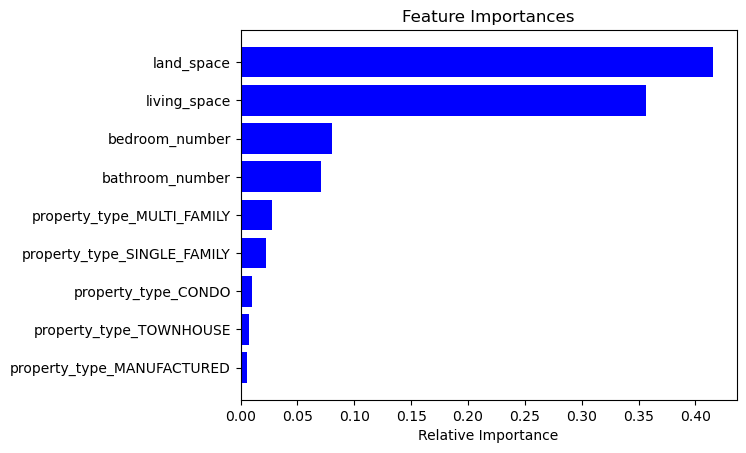

In [13]:
# Finding the most important features
# storing all feature names
feature_names = X.columns[1:]
#feature_names
importances = RfModel.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
#### Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset.

In [15]:
# Let's see important features in tabular form
import pandas as pd
feature_importances = pd.DataFrame(RfModel.feature_importances_,index =  X.columns[1:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances[:10]

,importance
land_space,0.415434
living_space,0.356800
bedroom_number,0.080543
bathroom_number,0.071108
property_type_MULTI_FAMILY,0.027771
property_type_SINGLE_FAMILY,0.022114
property_type_CONDO,0.010419
property_type_TOWNHOUSE,0.007812
property_type_MANUFACTURED,0.005843
property_type_APARTMENT,0.001861


In [16]:
df2 = X[['land_space','living_space','property_type_SINGLE_FAMILY','bedroom_number','bathroom_number','property_type_CONDO','property_type_TOWNHOUSE']].copy()
X2 = df2.iloc[:,1:].values 
#X2
y2=df2.iloc[:,0].values
# Partitioning the data with 80/20 split
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [17]:
# this model contains all important features only with the same parameters as above
from sklearn.ensemble import RandomForestRegressor
RfModel2 = RandomForestRegressor(random_state=1, max_depth=10)
# fitting the model
RfModel2.fit(X2_train,y2_train)
# making predictions
y_pred2 = RfModel2.predict(X2_test)

In [18]:
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred2)))
# let's check r^2
print('Random Forest R squared": %.4f' % RfModel2.score(X2_test, y2_test))

Mean Absolute Error: 3868.6621022755853
Mean Squared Error: 33087545.692797843
Root Mean Squared Error: 5752.177474035188
Random Forest R squared": 0.1388


In [19]:
#### With R^2 = 14%, we observed that training model with only important features did not improve the model.

In [ ]:
# Now, trying with 100 estimators
from sklearn.ensemble import RandomForestRegressor
RfModel3 = RandomForestRegressor(n_estimators=100, random_state=0)  
# Fitting the model
RfModel3.fit(X_train, y_train) 
# making predictions
y_pred3 = RfModel3.predict(X_test)

In [ ]:
# Evaluating the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
# let's check r^2
print('Random Forest R squared": %.4f' % RfModel3.score(X_test, y_test))

In [ ]:
# Can we better than this,trying again with 200 estimators
from sklearn.ensemble import RandomForestRegressor
# instantiating
RfModel4 = RandomForestRegressor(n_estimators=200, random_state=0) 
# fitting
RfModel4.fit(X_train, y_train)  
# predicting
y_pred4 = RfModel4.predict(X_test)

In [ ]:
# Evaluating 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print('Random Forest R squared": %.4f' % RfModel4.score(X_test, y_test))

In [ ]:
# Trying with 500 estimators
from sklearn.ensemble import RandomForestRegressor

RfModel5 = RandomForestRegressor(n_estimators=500, random_state=42)  
RfModel5.fit(X_train, y_train)  
y_pred5 = RfModel5.predict(X_test)


In [ ]:
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print('Random Forest R squared": %.4f' % RfModel5.score(X_test, y_test))

In [ ]:
# Trying with 1000 estimators
from sklearn.ensemble import RandomForestRegressor

RfModel6 = RandomForestRegressor(n_estimators=1000, random_state=0)  
RfModel6.fit(X_train, y_train)  
y_pred6 = RfModel6.predict(X_test)

In [ ]:
# Evaluating the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))
print('Random Forest R squared: %.4f' % RfModel6.score(X_test, y_pred6))